<table align="center">
  <td align="center"><a target="_blank" href="http://introtodeeplearning.com">
        <img src="https://i.ibb.co/Jr88sn2/mit.png" style="padding-bottom:5px;" />
      Visit MIT Deep Learning</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/MITDeepLearning/introtodeeplearning/blob/master/lab1/PT_Part1_Intro.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/MITDeepLearning/introtodeeplearning/blob/master/lab1/PT_Part1_Intro.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information


In [ ]:
# Copyright 2025 MIT Introduction to Deep Learning. All Rights Reserved.
#
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of MIT Introduction
# to Deep Learning must reference:
#
# © MIT Introduction to Deep Learning
# http://introtodeeplearning.com
#

# Lab 1: Intro to PyTorch and Music Generation with RNNs

In this lab, you'll get exposure to using PyTorch and learn how it can be used for deep learning. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.


# Part 1: Intro to PyTorch

## 0.1 Install PyTorch

[PyTorch](https://pytorch.org/) is a popular deep learning library known for its flexibility and ease of use. Here we'll learn how computations are represented and how to define a simple neural network in PyTorch. For all the labs in Introduction to Deep Learning 2025, there will be a PyTorch version available.

Let's install PyTorch and a couple of dependencies.

In [1]:
import torch
import torch.nn as nn

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.2/658.2 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━

## 1.1 What is PyTorch?

PyTorch is a machine learning library, like TensorFlow. At its core, PyTorch provides an interface for creating and manipulating [tensors](https://pytorch.org/docs/stable/tensors.html), which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base datatypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions. PyTorch provides the ability to perform computation on these tensors, define neural networks, and train them efficiently.

The [```shape```](https://pytorch.org/docs/stable/generated/torch.Tensor.shape.html#torch.Tensor.shape) of a PyTorch tensor defines its number of dimensions and the size of each dimension. The `ndim` or [```dim```](https://pytorch.org/docs/stable/generated/torch.Tensor.dim.html#torch.Tensor.dim) of a PyTorch tensor provides the number of dimensions (n-dimensions) -- this is equivalent to the tensor's rank (as is used in TensorFlow), and you can also think of this as the tensor's order or degree.

Let’s start by creating some tensors and inspecting their properties:


In [2]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")


`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


Vectors and lists can be used to create 1-d tensors:

In [3]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")


`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


Next, let’s create 2-d (i.e., matrices) and higher-rank tensors. In image processing and computer vision, we will use 4-d Tensors with dimensions corresponding to batch size, number of color channels, image height, and image width.

In [5]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = torch.tensor([[1, 2, 3, 4, 5, 6] , [7, 8, 9, 10, 11, 12]])

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

'''TODO: Define a 4-d Tensor.'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = torch.zeros(10, 3, 256, 256)

assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


As you have seen, the `shape` of a tensor provides the number of elements in each tensor dimension. The `shape` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank tensor:

In [6]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([ 7,  8,  9, 10, 11, 12])
`column_vector`: tensor([2, 8])
`scalar`: 2


## 1.2 Computations on Tensors

A convenient way to think about and visualize computations in a machine learning framework like PyTorch is in terms of graphs. We can define this graph in terms of tensors, which hold data, and the mathematical operations that act on these tensors in some order. Let's look at a simple example, and define this computation using PyTorch:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/add-graph.png)

In [7]:
# Create the nodes in the graph and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch overrides the "+" operation so that it is able to act on Tensors
print(f"c1: {c1}")
print(f"c2: {c2}")


c1: 76
c2: 76


Notice how we've created a computation graph consisting of PyTorch operations, and how the output is a tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in PyTorch to construct this computation function:

In [8]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a, b):
    '''TODO: Define the operation for c, d, e.'''
    c = torch.add(a, b)
    d = torch.subtract(b, 1)
    e = torch.multiply(c, d)
    return e


Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [9]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a, b)
print(f"e_out: {e_out}")

e_out: 6.0


Notice how our output is a tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

## 1.3 Neural networks in PyTorch
We can also define neural networks in PyTorch. PyTorch uses [``torch.nn.Module``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html), which serves as a base class for all neural network modules in PyTorch and thus provides a framework for building and training neural networks.

Let's consider the example of a simple perceptron defined by just one dense (aka fully-connected or linear) layer: $ y = \sigma(Wx + b) $, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output.

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph-2.png)

We will use `torch.nn.Module` to define layers -- the building blocks of neural networks. Layers implement common neural networks operations. In PyTorch, when we implement a layer, we subclass `nn.Module` and define the parameters of the layer as attributes of our new class. We also define and override a function [``forward``](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.forward), which will define the forward pass computation that is performed at every step. All classes subclassing `nn.Module` should override the `forward` function.

Let's write a dense layer class to implement a perceptron defined above.

In [14]:
### Defining a dense layer ###

# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialize is random!
        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))

    def forward(self, x):
        '''TODO: define the operation for z (hint: use torch.matmul).'''
        z = torch.matmul(x, self.W) + self.bias
        '''TODO: define the operation for out (hint: use torch.sigmoid).'''
        y = torch.sigmoid(z)
        return y


Now, let's test the output of our layer.

In [15]:
# Define a layer and test the output!
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.0061, 0.2865, 0.9222]], grad_fn=<SigmoidBackward0>)


Conveniently, PyTorch has defined a number of ```nn.Modules``` (or Layers) that are commonly used in neural networks, for example a [```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) or [`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) module.

Now, instead of using a single ```Module``` to define our simple neural network, we'll use the  [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) module from PyTorch and a single [`nn.Linear` ](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer to define our network. With the `Sequential` API, you can readily create neural networks by stacking together layers like building blocks.

In [18]:
### Defining a neural network using the PyTorch Sequential API ###

# define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# Define the model
'''TODO: Use the Sequential API to define a neural network with a
    single linear (dense!) layer, followed by non-linearity to compute z'''
model = nn.Sequential(
    nn.Linear(n_input_nodes, n_output_nodes),
    nn.ReLU()
)


We've defined our model using the Sequential API. Now, we can test it out using an example input:

In [19]:
# Test the model with example input
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.0061, 0.2865, 0.9222]], grad_fn=<SigmoidBackward0>)


With PyTorch, we can create more flexible models by subclassing [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). The `nn.Module` class allows us to group layers together flexibly to define new architectures.

As we saw earlier with `OurDenseLayer`, we can subclass `nn.Module` to create a class for our model, and then define the forward pass through the network using the `forward` function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network model as above (i.e., Linear layer with an activation function after it), now using subclassing and using PyTorch's built in linear layer from `nn.Linear`.

In [20]:
### Defining a model using subclassing ###

class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        '''TODO: define a model with a single Linear layer and sigmoid activation.'''
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()

    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output


Let's test out our new model, using an example input, setting `n_input_nodes=2` and `n_output_nodes=3` as before.

In [21]:
n_input_nodes = 2
n_output_nodes = 3
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([[1, 2.]])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.3597, 0.2406, 0.2005]], grad_fn=<SigmoidBackward0>)


Importantly, `nn.Module` affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the `forward` function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument `isidentity` to control this behavior:

In [23]:
### Custom behavior with subclassing nn.Module ###

class LinearButSometimesIdentity(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearButSometimesIdentity, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    '''TODO: Implement the behavior where the network outputs the input, unchanged,
        under control of the isidentity argument.'''
    def forward(self, inputs, isidentity=False):
        if isidentity:
          return inputs
        else:
          return self.linear(inputs)


Let's test this behavior:

In [24]:
# Test the IdentityModel
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([[1, 2.]])

'''TODO: pass the input into the model and call with and without the input identity option.'''
out_with_linear = model(x_input, False)

out_with_identity = model(x_input, True)

print(f"input: {x_input}")
print("Network linear output: {}; network identity output: {}".format(out_with_linear, out_with_identity))

input: tensor([[1., 2.]])
Network linear output: tensor([[ 0.4154, -1.8300, -0.2105]], grad_fn=<AddmmBackward0>); network identity output: tensor([[1., 2.]])


Now that we have learned how to define layers and models in PyTorch using both the Sequential API and subclassing `nn.Module`, we're ready to turn our attention to how to actually implement network training with backpropagation.

## 1.4 Automatic Differentiation in PyTorch

In PyTorch, [`torch.autograd`](https://pytorch.org/docs/stable/autograd.html) is used for [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation), which is critical for training deep learning models with [backpropagation](https://en.wikipedia.org/wiki/Backpropagation).

We will use the PyTorch [`.backward()`](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html) method to trace operations for computing gradients. On a tensor, the [`requires_grad`](https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html) attribute controls whether autograd should record operations on that tensor. When a forward pass is made through the network, PyTorch builds a computational graph dynamically; then, to compute the gradient, the `backward()` method is called to perform backpropagation.

Let's compute the gradient of $ y = x^2 $:

In [27]:
### Gradient computation ###

# y = x^2
# Example: x = 3.0
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()  # Compute the gradient

dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0


dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how PyTorch's autograd can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $ L=(x-x_f)^2 $. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to minimize. While we can clearly solve this problem analytically ($ x_{min}=x_f $), considering how we can compute this using PyTorch's autograd sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=1.1077388525009155


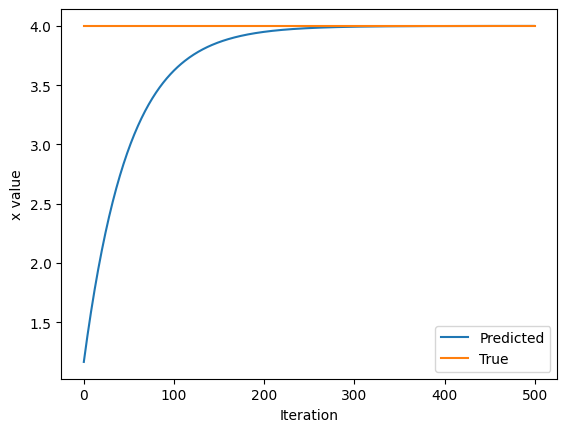

In [28]:
### Function minimization with autograd and gradient descent ###

# Initialize a random value for our intial x
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # Learning rate
history = []
x_f = 4  # Target value


# We will run gradient descent for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the update.
for i in range(500):
    x = torch.tensor([x], requires_grad=True)

    # TODO: Compute the loss as the square of the difference between x and x_f
    loss = (x - x_f) ** 2

    # Backpropagate through the loss to compute gradients
    loss.backward()

    # Update x with gradient descent
    x = x.item() - learning_rate * x.grad

    history.append(x.item())

# Plot the evolution of x as we optimize toward x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()


Now, we have covered the fundamental concepts of PyTorch -- tensors, operations, neural networks, and automatic differentiation. Fire!!
